In [20]:
from IPython.display import display, HTML

html_cred = """
<div style="border: 2px solid #28a745; border-radius: 10px; padding: 20px; background-color: #f8f9fa; font-family: sans-serif;">
    <h3 style="color: #28a745; margin-top: 0;">👤 Project Credentials</h3>
    <p style="margin: 5px 0;"><strong>Created by:</strong> Amin Sabari</p>
    <p style="margin: 5px 0;"><strong>Role:</strong> Strategic Operations Leader | Data Scientist</p>
    <a href="https://www.linkedin.com/in/aminsabari" target="_blank"
       style="display: inline-block; margin-top: 10px; padding: 8px 15px; background-color: #0077b5; color: yellow; text-decoration: black; border-radius: 5px;">
       Connect on LinkedIn
    </a>
</div>
"""
display(HTML(html_cred))

Proyek ini mendemonstrasikan kemampuan analisis data untuk optimalisasi bisnis. Menggunakan dataset transaksi retail (1.000+ entitas), proyek ini memetakan tren profitabilitas jangka panjang dan mengidentifikasi peluang efisiensi biaya operasional menggunakan Python.

In [7]:
import pandas as pd
import numpy as np

# Membuat data simulasi operasional retail
np.random.seed(42)
data = {
    'Tanggal': pd.date_range(start='2023-01-01', periods=1000, freq='D'),
    'Kategori': np.random.choice(['Elektronik', 'Perabotan', 'Pakaian', 'Makanan'], 1000),
    'Penjualan': np.random.randint(100, 5000, 1000),
    'Biaya_Operasional': np.random.randint(50, 2000, 1000)
}

df_sales = pd.DataFrame(data)
df_sales['Profit'] = df_sales['Penjualan'] - df_sales['Biaya_Operasional']

print("Data berhasil dibuat secara instan!")
df_sales.head()

Data berhasil dibuat secara instan!


,Tanggal,Kategori,Penjualan,Biaya_Operasional,Profit
0,2023-01-01,Pakaian,2608,1020,1588
1,2023-01-02,Makanan,2879,1027,1852
2,2023-01-03,Elektronik,1024,1063,-39
3,2023-01-04,Pakaian,3056,1085,1971
4,2023-01-05,Pakaian,1681,136,1545


In [8]:
# Analisis rata-rata profit per kategori
analisis_kategori = df_sales.groupby('Kategori')[['Penjualan', 'Profit']].mean().reset_index()

# Menampilkan hasil analisis
print("Rata-rata Penjualan dan Profit per Kategori:")
display(analisis_kategori)

Rata-rata Penjualan dan Profit per Kategori:


,Kategori,Penjualan,Profit
0,Elektronik,2601.271318,1582.604651
1,Makanan,2668.142857,1567.078571
2,Pakaian,2519.827586,1550.599138
3,Perabotan,2538.247826,1579.700000


/tmp/ipython-input-3491685630.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tren_bulanan = df_sales.resample('M')['Profit'].sum()


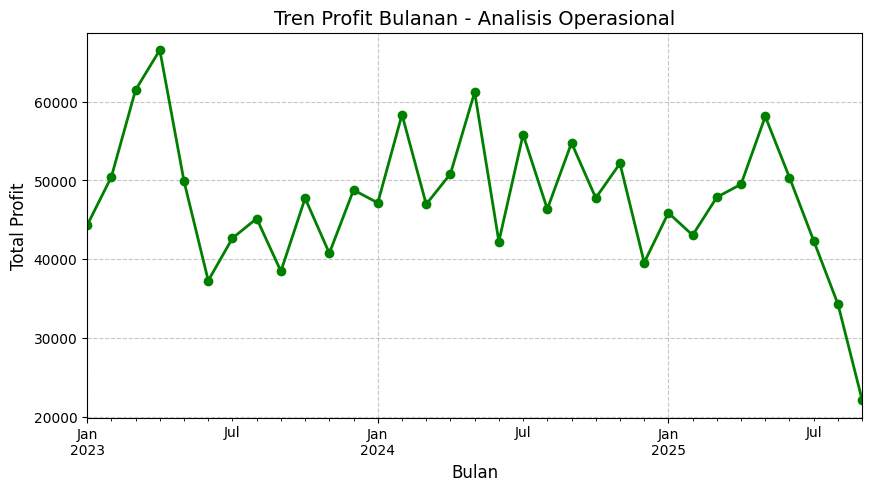

In [9]:
import matplotlib.pyplot as plt

# Mengelompokkan data per bulan untuk melihat tren
df_sales.set_index('Tanggal', inplace=True)
tren_bulanan = df_sales.resample('M')['Profit'].sum()

# Membuat Grafik
plt.figure(figsize=(10, 5))
tren_bulanan.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Tren Profit Bulanan - Analisis Operasional', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Menghitung rasio profit per kategori
df_efisiensi = df_sales.groupby('Kategori').agg({
    'Penjualan': 'sum',
    'Biaya_Operasional': 'sum',
    'Profit': 'sum'
}).reset_index()

df_efisiensi['Efisiensi_%'] = (df_efisiensi['Profit'] / df_efisiensi['Biaya_Operasional']) * 100
df_efisiensi = df_efisiensi.sort_values(by='Efisiensi_%', ascending=False)

print("Analisis Efisiensi Operasional per Kategori:")
display(df_efisiensi)

Analisis Efisiensi Operasional per Kategori:


,Kategori,Penjualan,Biaya_Operasional,Profit,Efisiensi_%
3,Perabotan,583797,220466,363331,164.801375
2,Pakaian,584600,224861,359739,159.982834
0,Elektronik,671128,262816,408312,155.360404
1,Makanan,747080,308298,438782,142.323985


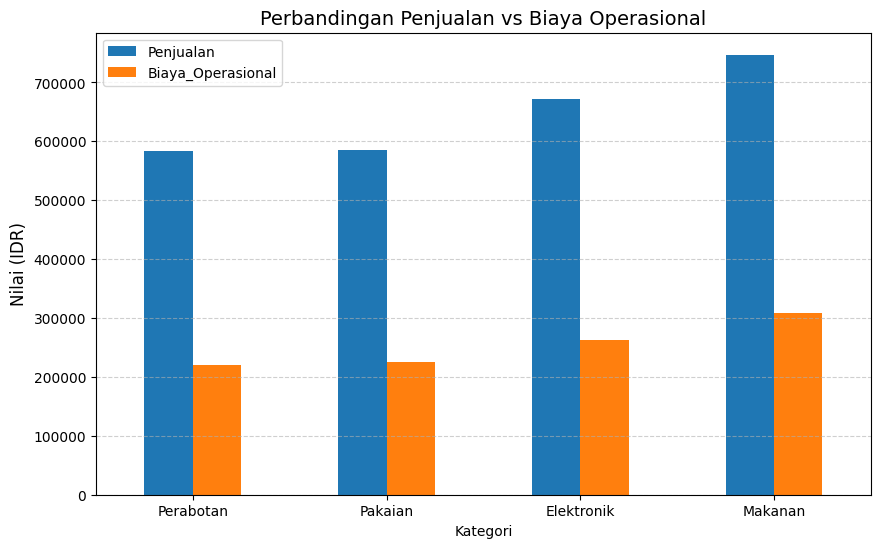

In [11]:
# Membuat grafik batang ganda
df_efisiensi.plot(x='Kategori', y=['Penjualan', 'Biaya_Operasional'], kind='bar', figsize=(10, 6))
plt.title('Perbandingan Penjualan vs Biaya Operasional', fontsize=14)
plt.ylabel('Nilai (IDR)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()